<a href="https://colab.research.google.com/github/IIbitoye/FDSfE_IIbitoye/blob/main/HW3/ItesCitibikedataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IDEA:**
Citibike usage would be different by gender if the bikes are more comfrotable for people who are taller and with larger frames.
(This is the general idea we are trying to prove.)

**NULL HYPOTHESIS H0:** Citibike usage would be the same by gender if the bikes are more comfortable for people who are taller and with larger frames.
(This is the opposite of our main idea)

**ALTERNATIVE HYPOTHESIS HA:** Citibike usage would be the same by gender if the bikes are more comfortable for people who are shorter and with smaller frames or Citibike usage would be different by gender if the bikes are more comfortable for people who are taller and with larger frames.

(This is the complement of our Null Hypothesis. Our Null Hpothesis and Alternative hypothesis should cover all possible outcomes of our idea.)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

Here, I imported the packages I needed to carry out certain tasks in my programme.

In [2]:
pvalue=0.05

This is my chosen threshold oof possibility of my alternative hypothesis. It is at a 2 sigma confidence level, a 5% possibility.

In [3]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


I noticed the column gender: its encoded as a binary - 1 is for customers that identified as male, 2 for customers that identified as female. 0 is for non-binary and not registered genders

In [4]:
cbMay19.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06
mean,1.067189e+03,1.671397e+03,4.073698e+01,-7.398223e+01,1.664596e+03,4.073675e+01,-7.398248e+01,2.712861e+04,1.979833e+03,1.152992e+00
std,1.254636e+04,1.473509e+03,3.062224e-02,1.970116e-02,1.473196e+03,3.048823e-02,1.976340e-02,6.404188e+03,1.199213e+01,5.516776e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.406860e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.790000e+02,3.820000e+02,4.071740e+01,-7.399595e+01,3.800000e+02,4.071723e+01,-7.399601e+01,2.082600e+04,1.969000e+03,1.000000e+00
50%,6.530000e+02,5.160000e+02,4.073726e+01,-7.398518e+01,5.150000e+02,4.073705e+01,-7.398584e+01,2.878200e+04,1.982000e+03,1.000000e+00
75%,1.158000e+03,3.293000e+03,4.075757e+01,-7.397121e+01,3.292000e+03,4.075715e+01,-7.397152e+01,3.257600e+04,1.990000e+03,1.000000e+00
max,2.922656e+06,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.800200e+04,2.003000e+03,2.000000e+00


This is to show more info about our dataset.

In [5]:
cbMay19["tripduration"]

0           139
1           754
2          2308
3           143
4           138
           ... 
1924558     304
1924559     324
1924560    1926
1924561    2047
1924562     964
Name: tripduration, Length: 1924563, dtype: int64

Since we are mostly concerened about the tripduration, I printed out the column to make it easy for us to focus on its content.

In [6]:
cbMay19["tripduration"].describe()

count    1.924563e+06
mean     1.067189e+03
std      1.254636e+04
min      6.100000e+01
25%      3.790000e+02
50%      6.530000e+02
75%      1.158000e+03
max      2.922656e+06
Name: tripduration, dtype: float64

This just shows us more information about the tripduration.

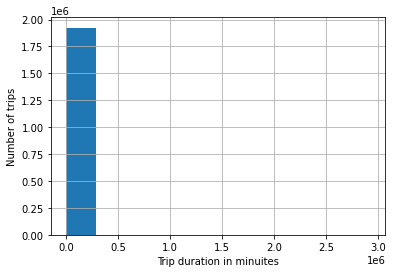

In [7]:
plt.hist(cbMay19["tripduration"])
plt.xlabel("Trip duration in minuites")
plt.ylabel("Number of trips")
plt.grid();

This is a histogram plot of the number of trips taken, against the trip duration in minuites.Because of some unnecessarily huge values contained in our dataset, we are presented with an unusual histograph that doesn't show us much information.

In [8]:
cbMay19_clean = cbMay19[cbMay19["tripduration"]<=1440]
cbMay19_clean

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


I cleaned up the data in our tripduration column by filtering out trips with a duration longer than 1 day. This makes our data easier to work with and easier to interpret.

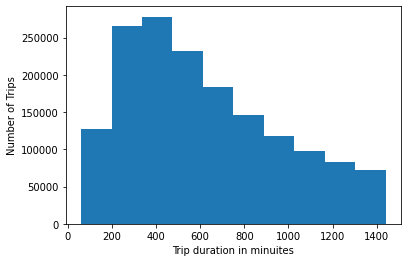

In [9]:
plt.hist(cbMay19_clean["tripduration"])
plt.xlabel("Trip duration in minuites")
plt.ylabel("Number of Trips");

This is the histogram of our cleaned up data. We can see that it now takes on a better shape and is easier to obtain information from. This histogram is skewed to the right.

In [10]:
malegroup =cbMay19_clean[cbMay19_clean["gender"]==1]
malegroup

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1
7,524,2019-05-01 00:01:21.0070,2019-05-01 00:10:05.9440,380,W 4 St & 7 Ave S,40.734011,-74.002939,439,E 4 St & 2 Ave,40.726281,-73.989780,16742,Subscriber,1964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924548,187,2019-05-31 23:59:21.1690,2019-06-01 00:02:28.7060,3496,1 Ave & E 110 St,40.792327,-73.938300,3502,Lexington Ave & E 111 St,40.795412,-73.944123,26794,Subscriber,1992,1
1924549,345,2019-05-31 23:59:22.6070,2019-06-01 00:05:08.5390,3298,Warren St & Court St,40.686371,-73.993833,3377,Carroll St & Bond St,40.678612,-73.990373,33433,Subscriber,1993,1
1924551,233,2019-05-31 23:59:28.4400,2019-06-01 00:03:21.5050,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34972,Subscriber,1974,1
1924553,824,2019-05-31 23:59:29.8370,2019-06-01 00:13:13.8450,3117,Franklin St & Dupont St,40.735640,-73.958660,3093,N 6 St & Bedford Ave,40.717452,-73.958509,15228,Subscriber,1987,1


In [11]:
femalegroup =cbMay19_clean[cbMay19_clean["gender"]==2]
femalegroup

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
10,236,2019-05-01 00:01:36.4020,2019-05-01 00:05:33.1980,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34411,Subscriber,1957,2
12,536,2019-05-01 00:01:44.6580,2019-05-01 00:10:41.3390,243,Fulton St & Rockwell Pl,40.688410,-73.979458,397,Fulton St & Clermont Ave,40.684157,-73.969223,30962,Subscriber,1974,2
20,290,2019-05-01 00:02:27.8000,2019-05-01 00:07:18.1110,346,Bank St & Hudson St,40.736529,-74.006180,168,W 18 St & 6 Ave,40.739713,-73.994564,30209,Subscriber,1984,2
22,553,2019-05-01 00:02:37.0480,2019-05-01 00:11:50.9870,448,W 37 St & 10 Ave,40.756604,-73.997901,485,W 37 St & 5 Ave,40.750380,-73.983390,21028,Subscriber,1989,2
30,355,2019-05-01 00:03:23.7070,2019-05-01 00:09:18.8550,325,E 19 St & 3 Ave,40.736245,-73.984738,438,St Marks Pl & 1 Ave,40.727791,-73.985649,25468,Subscriber,1990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924554,699,2019-05-31 23:59:40.5130,2019-06-01 00:11:20.1020,368,Carmine St & 6 Ave,40.730386,-74.002150,470,W 20 St & 8 Ave,40.743453,-74.000040,16373,Subscriber,1976,2
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


I split up the data by gender to create two new datasets, information on the male passengers and information on the female passengers.

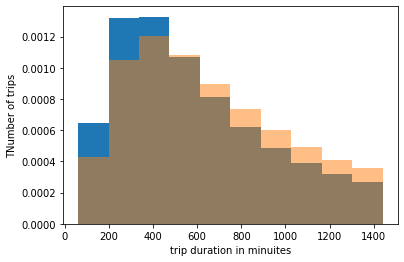

In [12]:
plt.hist(malegroup["tripduration"], density=1)
plt.hist(femalegroup["tripduration"],density=1,alpha=0.5)
plt.xlabel("trip duration in minuites")
plt.ylabel("TNumber of trips");

I plotted the histogram of our two new datasets, for easy comparison.The graph of the males is in blue and that of the females is in orange. The height of the males histogram is longer, indicating that they tend to take more trips than the females.

In [13]:
stats.ks_2samp(malegroup.tripduration, femalegroup.tripduration)

KstestResult(statistic=0.08424655017926841, pvalue=0.0)

In [14]:
stats.ttest_ind(malegroup.tripduration, femalegroup.tripduration)

Ttest_indResult(statistic=-100.89842165582859, pvalue=0.0)

The p value for both our tests are 0, which is insignificant and less than our 5% initial confidence percentage, so we reject our null hypothesis.

H0: The mean of the two groups are the same

HA: The mean of the two groups are different.

In [15]:
malegroup.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.121618e+06,1.121618e+06,1.121618e+06,1.121618e+06,1.121618e+06,1.121618e+06,1.121618e+06,1.121618e+06,1.121618e+06,1121618.0
mean,5.884167e+02,1.601057e+03,4.073751e+01,-7.398267e+01,1.591762e+03,4.073735e+01,-7.398288e+01,2.738286e+04,1.980388e+03,1.0
std,3.352549e+02,1.464201e+03,2.899624e-02,1.904303e-02,1.462985e+03,2.882356e-02,1.912940e-02,6.284382e+03,1.204233e+01,0.0
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.403346e+01,1.452900e+04,1.885000e+03,1.0
25%,3.210000e+02,3.790000e+02,4.071912e+01,-7.399490e+01,3.790000e+02,4.071911e+01,-7.399530e+01,2.126600e+04,1.972000e+03,1.0
50%,5.140000e+02,5.040000e+02,4.073913e+01,-7.398602e+01,5.030000e+02,4.073902e+01,-7.398650e+01,2.900400e+04,1.983000e+03,1.0
75%,8.060000e+02,3.263000e+03,4.075641e+01,-7.397371e+01,3.260000e+03,4.075601e+01,-7.397375e+01,3.262600e+04,1.990000e+03,1.0
max,1.440000e+03,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.799800e+04,2.003000e+03,1.0


In [16]:
femalegroup.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,376723.000000,376723.000000,376723.000000,376723.000000,376723.000000,376723.000000,376723.000000,376723.000000,376723.000000,376723.0
mean,652.454151,1714.843954,40.734135,-73.981473,1706.568654,40.734073,-73.981773,26703.210093,1981.404217,2.0
std,342.288862,1484.787803,0.031433,0.019728,1483.655229,0.031225,0.019796,6598.053796,11.949161,0.0
min,61.000000,72.000000,40.655400,-74.025353,72.000000,40.655400,-74.025353,14529.000000,1888.000000,2.0
25%,375.000000,377.000000,40.715348,-73.995101,373.000000,40.715348,-73.995299,19973.000000,1973.000000,2.0
50%,593.000000,518.000000,40.733143,-73.984517,517.000000,40.733320,-73.985162,28398.000000,1985.000000,2.0
75%,897.000000,3314.000000,40.754601,-73.969617,3314.000000,40.754121,-73.970325,32509.500000,1991.000000,2.0
max,1440.000000,3790.000000,40.814394,-73.907744,3790.000000,40.814394,-73.907744,38002.000000,2003.000000,2.0


In [17]:
mean1=malegroup["tripduration"].mean()
mean1

588.4166944539049

In [18]:
mean2=femalegroup["tripduration"].mean()
mean2

652.4541506624231

In [19]:
mean1==mean2

False

 I compared the means of both gender groups and they weren't the same

In [20]:
std1=malegroup["tripduration"].std()
std1

335.25493400230937

In [21]:
std2=femalegroup["tripduration"].std()
std2

342.2888618686749

In [22]:
(mean1>(mean2-std2))&(mean1<(mean2 + std2))

True

In [23]:
(mean2>(mean1-std1))&(mean2<(mean1 + std1))

True

Both groups fall within the range of the mean + standard deviation of the other.

In [24]:
stats.ttest_ind(malegroup.tripduration, femalegroup.tripduration)

Ttest_indResult(statistic=-100.89842165582859, pvalue=0.0)

The t tests measures the differences between the means of the two samples and displays a p value of 0.00, which is less than a 5% percent confidence. Thus,we reject the Null Hypothesis.

Are these samples from the same parent distribution?
Null hypotheis: They are not from the same parent distribution.
Alternative hypothesis: They are from the same parent distribution

In [25]:
stats.ks_2samp(malegroup.tripduration, femalegroup.tripduration)

KstestResult(statistic=0.08424655017926841, pvalue=0.0)

I ran a k test before normalizing the values and got a p value of 0, meaning we reject the null hypothesis.

In [26]:
normed_maletripdur=(malegroup["tripduration"]-malegroup["tripduration"].mean())//malegroup["tripduration"].std()
normed_maletripdur

0         -2.0
3         -2.0
4         -2.0
6         -1.0
7         -1.0
          ... 
1924548   -2.0
1924549   -1.0
1924551   -2.0
1924553    0.0
1924555   -1.0
Name: tripduration, Length: 1121618, dtype: float64

In [27]:
normed_femaletripdur=(femalegroup["tripduration"]-femalegroup["tripduration"].mean())//femalegroup["tripduration"].std()
normed_femaletripdur

10        -2.0
12        -1.0
20        -2.0
22        -1.0
30        -1.0
          ... 
1924554    0.0
1924556   -1.0
1924558   -2.0
1924559   -1.0
1924562    0.0
Name: tripduration, Length: 376723, dtype: float64

I normalized the data sets to ensure more accuracy.

In [28]:
stats.ks_2samp(normed_maletripdur, normed_femaletripdur)

KstestResult(statistic=0.020292734745288588, pvalue=2.6197813612862554e-101)

After normalizing and re-running the k test, we get a p value raised to the power of -101, which is a very small and insignifocant value. This means that we reject the null hypothesis, telling us that our datasets are from the same parent distribution.

Though our p values vary before and after normalization, the conclusion remains the same: We reject the Null Hypothesis.

In [29]:
cbMay19["starttime"]

0          2019-05-01 00:00:01.9010
1          2019-05-01 00:00:03.0210
2          2019-05-01 00:00:04.6270
3          2019-05-01 00:00:19.3340
4          2019-05-01 00:00:22.1840
                     ...           
1924558    2019-05-31 23:59:45.5760
1924559    2019-05-31 23:59:46.4650
1924560    2019-05-31 23:59:51.5060
1924561    2019-05-31 23:59:52.4170
1924562    2019-05-31 23:59:55.5500
Name: starttime, Length: 1924563, dtype: object

In [30]:
cbMay19_clean["tripdate"]=pd.to_datetime(cbMay19.starttime)
cbMay19_clean["tripdate"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2019-05-01 00:00:01.901
1         2019-05-01 00:00:03.021
3         2019-05-01 00:00:19.334
4         2019-05-01 00:00:22.184
6         2019-05-01 00:01:06.052
                    ...          
1924555   2019-05-31 23:59:41.679
1924556   2019-05-31 23:59:42.125
1924558   2019-05-31 23:59:45.576
1924559   2019-05-31 23:59:46.465
1924562   2019-05-31 23:59:55.550
Name: tripdate, Length: 1602328, dtype: datetime64[ns]

Next, I'll be creating two datasets; one for the weekend and one for the weekdays. 

In [31]:
weekdays=cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday<5]
weekdays

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,2019-05-01 00:00:01.901
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0,2019-05-01 00:00:03.021
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,2019-05-01 00:00:22.184
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1,2019-05-01 00:01:06.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1,2019-05-31 23:59:41.679
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2,2019-05-31 23:59:42.125
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2,2019-05-31 23:59:45.576
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2,2019-05-31 23:59:46.465


In [32]:
weekend=cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday<5]
weekend

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,2019-05-01 00:00:01.901
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0,2019-05-01 00:00:03.021
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,2019-05-01 00:00:22.184
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1,2019-05-01 00:01:06.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1,2019-05-31 23:59:41.679
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2,2019-05-31 23:59:42.125
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2,2019-05-31 23:59:45.576
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2,2019-05-31 23:59:46.465


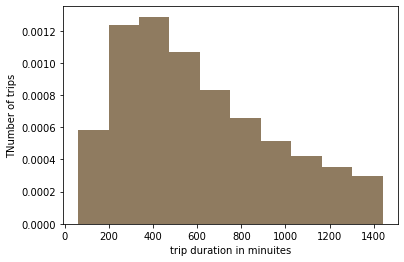

In [33]:
plt.hist(weekdays["tripduration"], density=1)
plt.hist(weekend["tripduration"],density=1,alpha=0.5)
plt.xlabel("trip duration in minuites")
plt.ylabel("TNumber of trips");

the histograph containing the two graphs shows only one diagram, meaning that the graph for both weekdayys and weekends are the same.

In [34]:
meanweekday= weekdays["tripduration"].mean()
meanweekday

609.1127525652822

In [35]:
meanweekend=weekend["tripduration"].mean()
meanweekend

609.1127525652822

In [36]:
meanweekday==meanweekend

True

Also, both the weekend dataset and the weekend dataset have the same mean.

From this little tests, we can say that the trip duration is characteristically the same on weekends and on week days. We can also infer that the gender-based differences we found for the overall sample are the same for both weekdays and weekends.